<a href="https://colab.research.google.com/github/Vanbk/Tensorflow/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# Traning parameter
learning_rate = 0.01
num_steps = 250000
batch_size = 256

display_step = 1000
example_to_show = 10

# Network Parameter

num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}


In [5]:
def encoder(x):
  layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['decoder_b1']))
  layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weights['encoder_h2']), biases['encoder_b2']))
  return layer2
def decoder(vector):
  layer1 = tf.nn.sigmoid(tf.add(tf.matmul(vector, weights['decoder_h1']), biases['decoder_b1']))
  layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weights['decoder_h2']), biases['decoder_b2']))
  return layer2

# construct model

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# prediction
y_pred = decoder_op
y_true = X # targeted labels are the input data

#Loss function ans optimizer

loss = tf.reduce_mean(tf.square(y_true - y_pred))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variable 

init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# creat a session
sess = tf.Session()

# run initializer
sess.run(init)

# Training 
train_loss_his = []
val_loss_his = []
for i in range(1, num_steps + 1):
  # get training data by batch
  batch_train_x, _ = mnist.train.next_batch(batch_size)
  batch_val_x, _ = mnist.validation.next_batch(batch_size)
  _, l = sess.run([optimizer, loss], feed_dict={X: batch_train_x})
  val_loss = sess.run(loss, feed_dict={X: batch_val_x})

  if i%display_step == 0 or i == 1:
    train_loss_his.append(l)
    val_loss_his.append(val_loss)

    print ("step : %i Minibatch Loss: %f Val_loss: %f"%(i, l, val_loss))    

step : 1 Minibatch Loss: 0.453785 Val_loss: 0.453651
step : 1000 Minibatch Loss: 0.137457 Val_loss: 0.140840
step : 2000 Minibatch Loss: 0.122711 Val_loss: 0.122713
step : 3000 Minibatch Loss: 0.115911 Val_loss: 0.115040
step : 4000 Minibatch Loss: 0.105014 Val_loss: 0.104808
step : 5000 Minibatch Loss: 0.097885 Val_loss: 0.098010
step : 6000 Minibatch Loss: 0.094037 Val_loss: 0.093933
step : 7000 Minibatch Loss: 0.091224 Val_loss: 0.090353
step : 8000 Minibatch Loss: 0.088143 Val_loss: 0.088163
step : 9000 Minibatch Loss: 0.085101 Val_loss: 0.085876
step : 10000 Minibatch Loss: 0.084915 Val_loss: 0.085721
step : 11000 Minibatch Loss: 0.081756 Val_loss: 0.080121
step : 12000 Minibatch Loss: 0.081013 Val_loss: 0.080718
step : 13000 Minibatch Loss: 0.074909 Val_loss: 0.074981
step : 14000 Minibatch Loss: 0.073971 Val_loss: 0.073751
step : 15000 Minibatch Loss: 0.073283 Val_loss: 0.073956
step : 16000 Minibatch Loss: 0.070466 Val_loss: 0.070342
step : 17000 Minibatch Loss: 0.066852 Val_lo

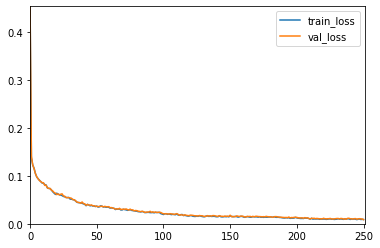

In [7]:
plt.plot(range(len(train_loss_his)), train_loss_his, label = "train_loss")
plt.plot(range(len(val_loss_his)), val_loss_his, label = "val_loss")
plt.axis([0, len(train_loss_his), 0, max(np.max(train_loss_his), np.max(val_loss_his))])
plt.legend()
plt.show()


Original Images


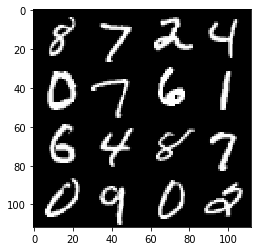

Reconstrcuted Images


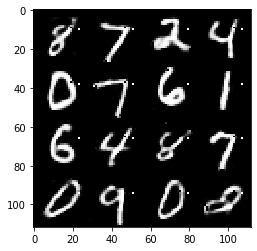

In [0]:
# Testing

n = 4

canvas_orig = np.empty((28*n, 28*n))
canvas_recon = np.empty((28*n, 28*n))

for i in range(n):
  batch_test_x, _ = mnist.test.next_batch(n)
  g = sess.run(decoder_op, feed_dict={X: batch_test_x})

  # Display original images

  for j in range(n):
    # Draw generated digits
    canvas_orig[i*28 : (i+1)*28, j*28:(j+1)*28] = batch_test_x[j].reshape([28, 28])

  # Display reconstructed images

  for j in range(n):
    # Draw generated digits
    canvas_recon[i*28 : (i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])

print ("Original Images")
plt.figure(figsize = (n, n))
plt.imshow(canvas_orig, cmap='gray')
plt.show()

print ("Reconstrcuted Images")
plt.figure(figsize = (n, n))
plt.imshow(canvas_recon, cmap='gray')
plt.show()